# HW7: Numerical Integration

- Consider the one-dimensional integral of the form
\begin{equation*}
F = \int_a^b f(x) dx
\end{equation*}
- The classical methods of numerical integration are based on the
  geometrical interpretation of the integral as the area under the
  curve.
- The x-axis is divided into $n$ equal intervals of width $\Delta
  x$, where $\Delta x$ is given by 
\begin{equation*}
\Delta x = \frac{b- a }{n}
\end{equation*}
and
\begin{equation*}
x_n = x_0 + n \Delta  x
\end{equation*}
where $x_0 = a$ and $x_n = b$.

- The *trapezoidal* rule  is
\begin{equation*}
F_n = \left [\frac{1}{2} f(x_0) + \sum_{i = 1}^{n-1} f(x_i) +
  \frac{1}{2} f(x_n) \right] \Delta x
\end{equation*}

- *Simpson's rule* is
\begin{equation*}
F_n = \frac{1}{3} \left[ f(x_0) + 4 f(x_1) + 2 f(x_2) + 4 f(x_3) +
  \cdot \cdot \cdot 2 f(x_{n-2}) + 4 f(x_{n-1}) + f(x_n)\right] \Delta x
\end{equation*}

- The *Monte Carlo* estimate for $F_n$ is given
  by
\begin{equation*}
F_n = A \frac{n_h}{n}
\end{equation*}
where $n_h$ is the number of ``hits'' or points below the curve,
$n$ is the total points, and $A = H(b-a)$ is the area of the rectangle.

- Alternatively, the *Monte Carlo* procedure, based on a theorem of
  calculus, is 
\begin{equation*}
F_n = (b-a) \langle f \rangle = (b-a) \frac{1}{n} \sum_{i = 1}^n f(x_i)
\end{equation*}
where $x_i$ are random numbers distributed uniformly in the interval
$a \le x_i \le b$, and $n$ is the number of trials.



1. Find the estimate of $F_n$ for the integral of
\begin{equation*}
f(x) = 4 \sqrt{1 - x^2}
\end{equation*}
as a function of the number of intervals for trapezoidal and Simpson's rules and the number of trials for Monte Carlo.  Choose $a = 0$, $b = 1$, $H= 1$ to sample the function $\sqrt{1 - x^2}$. Compare with the exact result ($\pi$). 

2. Compare your results with the following scipy **integrate** function.  What is the **lambda** function?

```python
import numpy as np
import scipy.integrate as integrate

print(integrate.quad(lambda x: 4*np.sqrt(1 - x**2), 0, 1))

```


Actual Area: (3.1415926535897922, 3.533564552071766e-10)
Trapezoid Rule Area; using 1000000 intervals:
3.1415926467569584
Simpsons Rule Area; using 1000000 intervals:
3.141592653130543
Monte Carlo Area; using 1000000 intervals:
3.143052


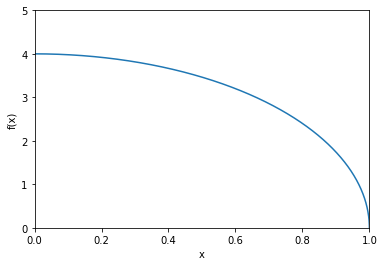

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import random as rnd

# Function ---------------------------------------------------------------------
def Fx(x):
  return 4*np.sqrt(1-x**2)
#-------------------------------------------------------------------------------

# Trapezoid Rule ---------------------------------------------------------------
def trap_rule(F,x0,xf,delta_x):
  x = np.arange(x0,xf+delta_x,delta_x)
  area = np.sum((1/2)*F(x[0::len(x)-1])) + np.sum(F(x[1:-2]))
  return area*delta_x
#-------------------------------------------------------------------------------

# Simpsons Rule ---------------------------------------------------------------
def simp_rule(F,x0,xf,delta_x):
  x = np.arange(x0,xf+delta_x,delta_x)
  area = np.sum(F(x[0::(len(x)-1)])) + np.sum(4*F(x[1::2])) + np.sum(2*F(x[2::2]))
  return 1/3*area*delta_x
#-------------------------------------------------------------------------------

# Monte Carlo Rule ---------------------------------------------------------------
def mc_rule(F,x0,xf,H,delta_x):
  hit = 0
  num_intervals = (xf-x0)/delta_x
  A = H*(xf-x0)
  for _ in range(num_of_intervals):
    r = x0 + rnd.random()*(xf-x0)
    fr = rnd.random()*H
    if (fr < F(r)):
      hit = hit + 1
  return A*hit/num_intervals
#-------------------------------------------------------------------------------

# Parameters:
x0 = 0
xf = 1
num_of_intervals = 1000000
delta_x = (xf - x0)/num_of_intervals
H = 4        # Max F(x) value in interval
# Spaces:
x = np.arange(x0,xf+delta_x,delta_x)
y = Fx(x)

# Plot Function:
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0, 1)
plt.ylim(0, 5)

# Solvers:
trap_area = trap_rule(Fx,x0,xf,delta_x)
simp_area = simp_rule(Fx,x0,xf,delta_x)
mc_area = mc_rule(Fx,x0,xf,H,delta_x)

# Printing Areas:
print("Actual Area: " + str(integrate.quad(lambda x: 4*np.sqrt(1 - x**2), 0, 1)))

print("Trapezoid Rule Area; using " + str(num_of_intervals) + " intervals:")
print(trap_area)

print("Simpsons Rule Area; using " + str(num_of_intervals) + " intervals:")
print(simp_area)

print("Monte Carlo Area; using " + str(num_of_intervals) + " intervals:")
print(mc_area)